In [31]:
import time
import serial
from PIL import Image
import numpy as np
from IPython.display import display

ser = serial.Serial('COM36', 115200)  # change COM port
imgName = "frame"

width = 0
height = 0

has written!
got width!
got height!
got the image!
got the first prob!
got the second prob!


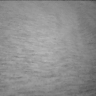

Data saved! Class 0 probability was 0.4765625, class 1 probability was 0.5234375
has written!
got width!
got height!
got the image!
got the first prob!
got the second prob!


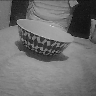

Data saved! Class 0 probability was 0.13671875, class 1 probability was 0.86328125


In [48]:
for i in range(2):
    ser.write(bytes([1]))

    print("has written!")

    width = ser.read(1)
    width = int.from_bytes(width, "little")

    print("got width!")


    height = ser.read(1)
    height = int.from_bytes(height, "little")

    print("got height!")

    imageBytes = ser.read(height * width)

    print("got the image!")


    class0Prob = ser.read(4)
    # easiest way i could find to convert from byte to float32
    class0Prob = np.frombuffer(class0Prob, dtype=np.float32)[0]

    print("got the first prob!")

    class1Prob = ser.read(4)
    class1Prob = np.frombuffer(class1Prob, dtype=np.float32)[0]

    print("got the second prob!")

    # l for grayscale, then pass in the resolution, and then the bytes
    img = Image.frombytes('L', (width, height), imageBytes)  # 'L' = grayscale
    display(img)
    # now save as image
    img.save(f"{imgName}_{i}.png")

    print(f"Data saved! Class 0 probability was {class0Prob}, class 1 probability was {class1Prob}")

    time.sleep(5)